# Plotting PyPSA results (simplified version 4-nodes clustering and 1 year data - Bolivia)

In [57]:
###### algunas cosas cambian si pongo como comentarios en el import de geoviews y hvplot (liberias conflictivas?)

import logging
import os

import pypsa
import yaml
import pandas as pd
import geopandas as gpd
#import geoviews as gv
#import hvplot.pandas 
import numpy as np
import scipy as sp
import networkx as nx

# plotting stuff
import matplotlib.pyplot as plt

plt.style.use("bmh")
import seaborn as sns  ###
import cartopy.crs as ccrs

sns.set(style="darkgrid")

from scipy.sparse import csgraph
from itertools import product

from shapely.geometry import Point, LineString
import shapely, shapely.prepared, shapely.wkt

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

import sys

sys.path.append("../")  # to import helpers
from scripts._helpers import sets_path_to_root

sets_path_to_root("pypsa-earth")

max_node_size = 1.0  # maximum size of a node for plotting purposes [used in plots]

This is the repository path:  c:\Users\Lenovo\Desktop\pypsa-earth
Had to go 0 folder(s) up.


In [58]:
# utility function for nice plotting

def normalize_node_size(values, max_node_size=max_node_size):
    return values / values.max() * max_node_size

# Load all networks

In [59]:
# add_electricity_network = os.getcwd() + '/networks/elec.nc'
# n_add_el = pypsa.Network(add_electricity_network)

# clustered_network = os.getcwd() + '/networks/elec_s_20.nc'
# n_cluster = pypsa.Network(clustered_network)



#Se carga el documento (o la direccion/path del mismo) a una variable (solved_network)

solved_network = os.getcwd() + "/results/networks/elec_s_4_ec_lcopt_Co2L-4H.nc"

base_network= os.getcwd() +  "/networks/base.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_base= pypsa.Network(base_network)

n_solve = pypsa.Network(solved_network)

INFO:pypsa.io:Imported network base.nc has buses, lines, transformers
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-4H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


# Base network

In [60]:
n_base

PyPSA Network 'PyPSA-Eur'
Components:
 - Bus: 155
 - Line: 161
 - Transformer: 39
Snapshots: 8760

(<matplotlib.collections.PatchCollection at 0x21ef0d430a0>,
 <matplotlib.collections.LineCollection at 0x21ef0d1fc70>)

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


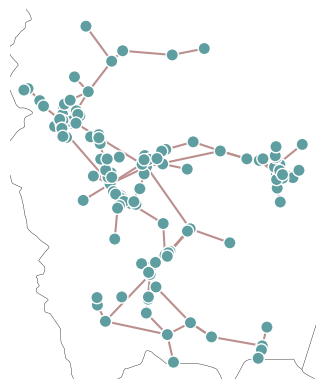

In [61]:
n_base.plot()

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


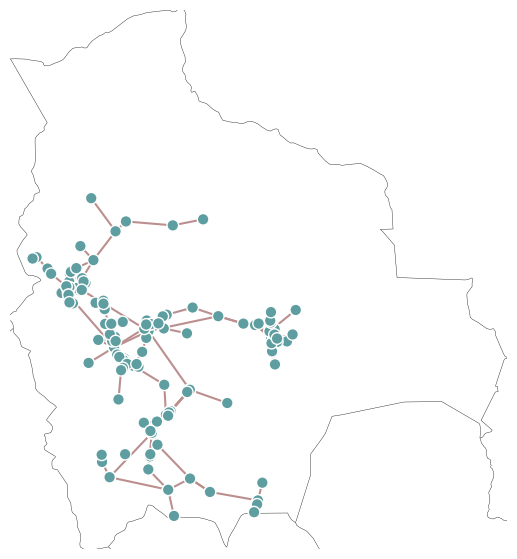

In [62]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

#countries = ["Bolivia"]

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n_base.plot(ax=ax)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


### Conections between buses 

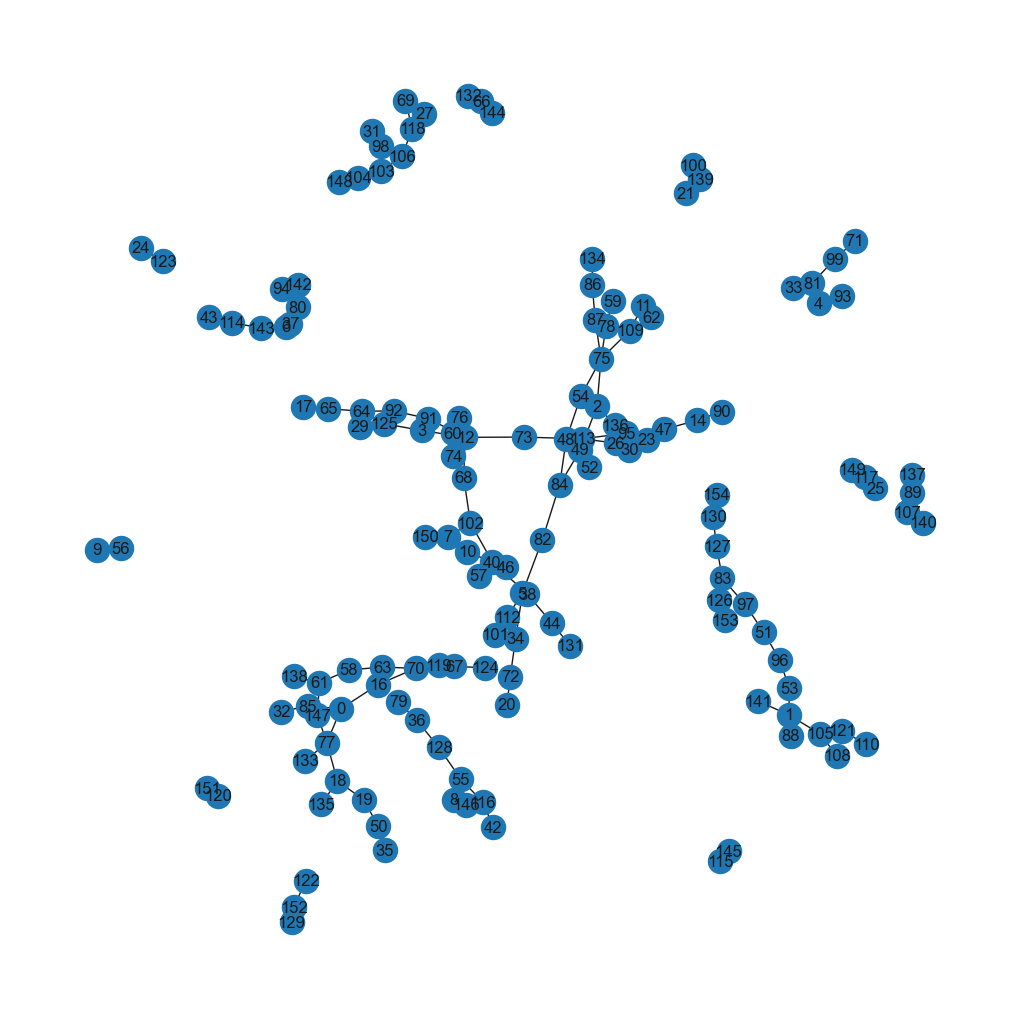

In [63]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

G = nx.Graph()


df_lines = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_lines_build_network.csv")

df_buses = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_buses_build_network.csv")

options = {
    'node_color': 'black',
    'node_size': 2,
    'width': 3,
}

df1 = df_lines[["bus0", "bus1"]]
df2 = df_buses[["lon", "lat"]]

G = nx.from_pandas_edgelist(df1, 'bus0', 'bus1')

pos = nx.spring_layout(G, scale=2, seed=84)

for i in range(len(df_buses)):
    pos[i] = [df_buses.lon[i], df_buses.lat[i]]



pos = nx.shell_layout(G)

plt.figure(figsize=(10, 10))
fig1 = nx.draw(G, with_labels=True)

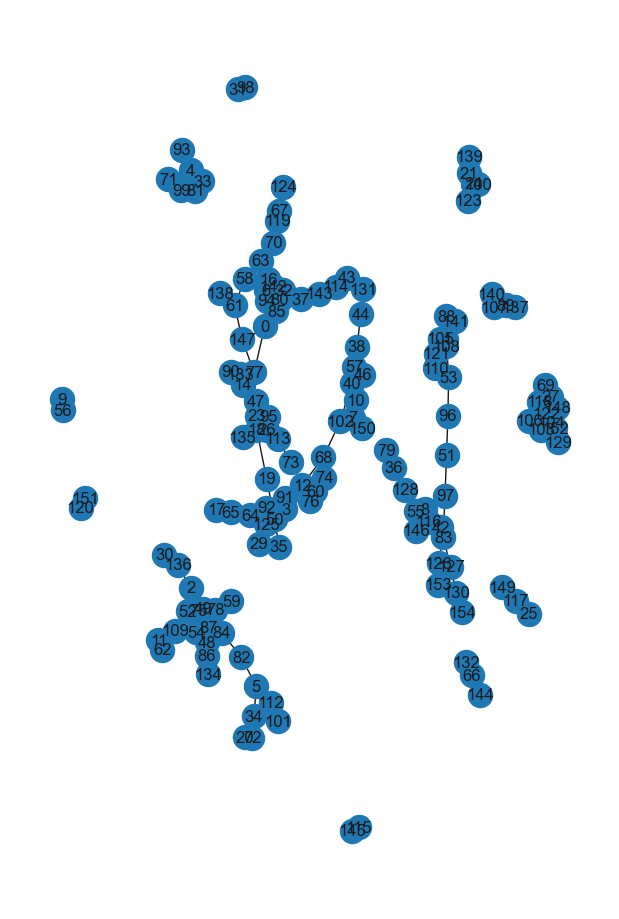

In [64]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

G = nx.Graph()


df_lines = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_lines_build_network.csv")

df_buses = pd.read_csv("C:/Users/Lenovo/Desktop/pypsa-earth/resources/base_network/all_buses_build_network.csv")

options = {
    'node_color': 'black',
    'node_size': 1,
    'width': 1,
}

df1 = df_lines[["bus0", "bus1"]]
df2 = df_buses[["lon", "lat"]]

G = nx.from_pandas_edgelist(df1, 'bus0', 'bus1')

pos = nx.spring_layout(G, scale=2, seed=84)

for i in range(len(df_buses)):
    node_id = i
    latitude = df_buses.lat[i]
    longitude = df_buses.lon[i]
    pos[node_id] = [latitude, longitude]



pos = nx.shell_layout(G)

plt.figure(figsize=(6, 9))
fig1 = nx.draw(G, with_labels=True)

# Solved network

### General info

In [65]:
n = n_solve
n

PyPSA Network
Components:
 - Bus: 12
 - Carrier: 16
 - Generator: 21
 - GlobalConstraint: 1
 - Line: 3
 - Link: 16
 - Load: 4
 - StorageUnit: 3
 - Store: 8
Snapshots: 2190

In [66]:
# ".global_constraints" muestra las restricciones consideradas para el modelo (en el config.yaml solo se tomo en cuenta el limite de emisiones) tonCO2/year

n.global_constraints

,sense,constant,mu,type,investment_period,carrier_attribute
GlobalConstraint,,,,,,
CO2Limit,<=,77500000.0,2.821604e-13,primary_energy,NaN,co2_emissions


In [67]:
# estimation of the total emissions from the system in MtonCO2:

emissions = n.generators_t.p / n.generators.efficiency * n.generators.carrier.map(n.carriers.co2_emissions) # t/h

#snapshot_weightings provides the number of agregation used for each time step considered (4 hours in this case) and @ ins a multiplier
n.snapshot_weightings.generators @ emissions.sum(axis=1).div(1e6) # Mt


2.560563834016457

In [68]:
##### check why the value does not appear 
#   - It seems that while the model run before, due to restrictions on simulation, proper solving wasn't possible (by increasing tolerances of the solver the model gets actual results)
# Eur/Year

n.objective

66080484.23840001

In [69]:
# Calculo del precio promedio de energia promedio en la red (costo total de operacion)
# Costo promedio de energia = (costos acumulados durante el periodo de analisis) /  [(sumatoria de las cargas variables en el tiempo)*(horas consideradas en cada time frame)

print("Costo total " + str(n.objective))
print("demanda total " + str(n.loads_t.p.sum().sum()*4))

(n.objective)/(n.loads_t.p.sum().sum()*4)

Costo total 66080484.23840001
demanda total 11338090.56244373


5.82818454963527

In [70]:
#promedio del costo marginal en los buses y a lo largo del año

n.buses_t.marginal_price.mean(axis = 1).mean()   ####   .plot(kind = "area")

13.736987204723933

In [71]:
n.buses_t

{'v_mag_pu_set': Empty DataFrame
 Columns: []
 Index: [2013-01-01 00:00:00, 2013-01-01 04:00:00, 2013-01-01 08:00:00, 2013-01-01 12:00:00, 2013-01-01 16:00:00, 2013-01-01 20:00:00, 2013-01-02 00:00:00, 2013-01-02 04:00:00, 2013-01-02 08:00:00, 2013-01-02 12:00:00, 2013-01-02 16:00:00, 2013-01-02 20:00:00, 2013-01-03 00:00:00, 2013-01-03 04:00:00, 2013-01-03 08:00:00, 2013-01-03 12:00:00, 2013-01-03 16:00:00, 2013-01-03 20:00:00, 2013-01-04 00:00:00, 2013-01-04 04:00:00, 2013-01-04 08:00:00, 2013-01-04 12:00:00, 2013-01-04 16:00:00, 2013-01-04 20:00:00, 2013-01-05 00:00:00, 2013-01-05 04:00:00, 2013-01-05 08:00:00, 2013-01-05 12:00:00, 2013-01-05 16:00:00, 2013-01-05 20:00:00, 2013-01-06 00:00:00, 2013-01-06 04:00:00, 2013-01-06 08:00:00, 2013-01-06 12:00:00, 2013-01-06 16:00:00, 2013-01-06 20:00:00, 2013-01-07 00:00:00, 2013-01-07 04:00:00, 2013-01-07 08:00:00, 2013-01-07 12:00:00, 2013-01-07 16:00:00, 2013-01-07 20:00:00, 2013-01-08 00:00:00, 2013-01-08 04:00:00, 2013-01-08 08:00:00, 

### Spatial temporal resolution

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


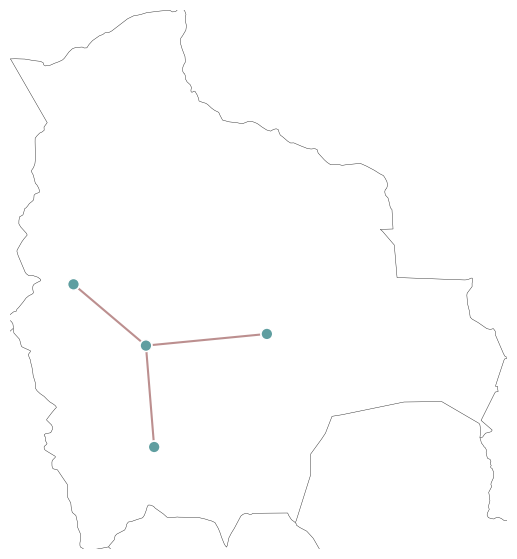

In [72]:
#Resultado grafico de la red electrica ideal (lineas verdes representan expansiones de la red)

#####beacuase all buses are not connected it might be that the problem is not fully solved 
# - Lines used in the model don't consider newer power lines (data bases were not apdated)
# - This is proved by comparing raw lines (all available lines in OSM) and clean lines (processed lines to be used in the model)
# - A linker is required to include new/additional data into the "all_clean_lines.geojson"

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n.plot(ax=ax)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


In [73]:
n.buses

,v_nom,country,x,y,control,generator,carrier,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
BO 0,220.0,BO,-68.046138,-16.434300,Slack,BO 0 OCGT,AC,,None,1.0,0.0,inf,
BO 1,220.0,BO,-63.342093,-17.641643,PQ,,AC,,None,1.0,0.0,inf,
BO 2,220.0,BO,-66.083608,-20.391908,PQ,,AC,,None,1.0,0.0,inf,
BO 3,220.0,BO,-66.283881,-17.925590,PQ,,AC,,None,1.0,0.0,inf,
BO 0 H2,1.0,BO,-68.046138,-16.434300,Slack,,H2,,None,1.0,0.0,inf,
BO 1 H2,1.0,BO,-63.342093,-17.641643,Slack,,H2,,None,1.0,0.0,inf,
BO 2 H2,1.0,BO,-66.083608,-20.391908,Slack,,H2,,None,1.0,0.0,inf,
BO 3 H2,1.0,BO,-66.283881,-17.925590,Slack,,H2,,None,1.0,0.0,inf,
BO 0 battery,1.0,BO,-68.046138,-16.434300,Slack,,battery,,None,1.0,0.0,inf,


In [18]:
#Se muestra el tamaño de la resolucion temporal del modelo - timesteps 
# - Currently the system is working with a toy version of Bolivia to allow faster solving times (4h time aggregation and a little over 5 months acoording the rules in the config.yaml file) 
# - A more complete model should be run eventually with different conditions (higher time resolution) or methods like tsam (https://tsam.readthedocs.io/en/latest/mathematicalBackgroundDoc.html)
#  

len(n.snapshots)

2190

### Overview components

In [74]:
#Imprimir la lista de componentes considerados en el dataframe creado

for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name, len(c.df)))

Component 'Bus' has 12 entries
Component 'Carrier' has 16 entries
Component 'GlobalConstraint' has 1 entries
Component 'Line' has 3 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 16 entries
Component 'Load' has 4 entries
Component 'Generator' has 21 entries
Component 'StorageUnit' has 3 entries
Component 'Store' has 8 entries


### Energy balance

In [75]:
# ".stores_t" hace referencia a la energia que se puede almacenar en un bus (se usa para definir otras tecnologias como storage)
# - https://pypsa.readthedocs.io/en/latest/components.html#store

n.stores_t.p.sum()

Store
BO 0 H2         0.0
BO 1 H2         0.0
BO 2 H2         0.0
BO 3 H2         0.0
BO 0 battery    0.0
BO 1 battery    0.0
BO 2 battery    0.0
BO 3 battery    0.0
dtype: float64

In [76]:
n.stores_t.p.sum().sum()

0.0

In [77]:
# se imprimen todos los generadores considerados en el modelo

##### check if loadshedding is being used in the config.yaml file, at the solving section 
# - load shedding is represented in the model by the inclution on additional "load" generation/generators 

n.generators

print(type(n.generators))
print(n.generators.columns)
n.generators.head()

<class 'pandas.core.frame.DataFrame'>
Index(['p_nom_max', 'weight', 'p_nom', 'capital_cost', 'efficiency',
       'p_nom_min', 'marginal_cost', 'p_nom_extendable', 'carrier', 'bus',
       'control', 'p_nom_opt', 'sign', 'build_year', 'min_up_time',
       'min_down_time', 'up_time_before', 'down_time_before', 'type',
       'p_min_pu', 'p_max_pu', 'p_set', 'q_set', 'lifetime', 'committable',
       'start_up_cost', 'shut_down_cost', 'ramp_limit_up', 'ramp_limit_down',
       'ramp_limit_start_up', 'ramp_limit_shut_down'],
      dtype='object')


,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,p_nom_extendable,carrier,bus,control,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,type,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BO 0 OCGT,inf,0.000000,49.250000,47234.561404,0.390,49.250000,14.394248,True,OCGT,BO 0,Slack,49.250000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 biomass,inf,0.000000,4.940000,278015.359506,0.468,4.940000,14.968019,False,biomass,BO 0,,4.940000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 oil,inf,0.000000,11.740000,38234.561404,0.393,11.740000,130.236332,False,oil,BO 0,,11.740000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 onwind,8.762420e+05,36659.936112,5.631965,109295.569252,1.000,5.631965,0.025038,True,onwind,BO 0,,5.631965,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 solar,5.510437e+05,84730.351848,30.096764,50855.958267,1.000,30.096764,0.020569,True,solar,BO 0,,30.096766,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


In [78]:
#Imprimir solo los generadores de Bolivia

########this is only necessary if several countries are studied at the same time

idx = ['BO' in x for x in n.generators.index]
n.generators.loc[idx,:].head()

,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,p_nom_extendable,carrier,bus,control,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,type,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BO 0 OCGT,inf,0.000000,49.250000,47234.561404,0.390,49.250000,14.394248,True,OCGT,BO 0,Slack,49.250000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 biomass,inf,0.000000,4.940000,278015.359506,0.468,4.940000,14.968019,False,biomass,BO 0,,4.940000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 oil,inf,0.000000,11.740000,38234.561404,0.393,11.740000,130.236332,False,oil,BO 0,,11.740000,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 onwind,8.762420e+05,36659.936112,5.631965,109295.569252,1.000,5.631965,0.025038,True,onwind,BO 0,,5.631965,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
BO 0 solar,5.510437e+05,84730.351848,30.096764,50855.958267,1.000,30.096764,0.020569,True,solar,BO 0,,30.096766,1.0,0,0,0,1,0,,0.0,1.0,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


In [79]:
#Imprimir la suma de potencias nominales de los generadores de Bolivia

idx = ['BO' in x for x in n.generators.index]

print(n.generators.loc[idx,:].p_nom.sum())
print(n.generators.loc[idx,:].p_nom_opt.sum())

4000002501.8014045
4000002501.8014135


In [80]:
# Difference between total load and generation
# losses = n.stores_t

n.generators_t.p.sum().sum() - n.loads_t.p.sum().sum()  # - substract storage losses


-1077896.5290941664

### Total installed generator capacity

In [81]:
gen_cap = n.generators.groupby(["carrier"]).sum()
gen_cap.to_csv('capacities_by_carrier.csv',index=False)
gen_cap


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16136\3296247162.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gen_cap = n.generators.groupby(["carrier"]).sum()


,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,p_nom_extendable,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
carrier,,,,,,,,,,,,,,,,,,,,,,,,,,,
CCGT,NaN,0.000000,1.029050e+03,168938.245618,1.000,1029.050000,25.780201,2,1.029050e+03,2.000,0,0,0,2,0,0.0,2.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,2.0,2.0
OCGT,NaN,0.000000,1.239830e+03,188938.245618,1.560,1239.830000,57.577730,4,1.239830e+03,4.000,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0
biomass,NaN,0.000000,7.723000e+01,556030.719012,0.936,77.230000,29.934861,0,7.723000e+01,2.000,0,0,0,2,0,0.0,2.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,2.0,2.0
load,NaN,0.000000,4.000000e+09,0.000000,4.000,0.000000,4.039997,0,4.000000e+09,0.004,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0
oil,inf,0.000000,1.174000e+01,38234.561404,0.393,11.740000,130.236332,0,1.174000e+01,1.000,0,0,0,1,0,0.0,1.0,0.0,0.0,inf,0,0.0,0.0,0.0,0.0,1.0,1.0
onwind,2.375876e+06,160337.867797,2.523041e+01,437182.277006,4.000,25.230409,0.101112,4,2.523041e+01,4.000,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0
solar,1.869809e+06,330825.566632,1.187210e+02,203423.833068,4.000,118.720996,0.078242,4,1.187210e+02,4.000,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0


In [82]:
n.stores_t.p.head()

Store,BO 0 H2,BO 1 H2,BO 2 H2,BO 3 H2,BO 0 battery,BO 1 battery,BO 2 battery,BO 3 battery
snapshot,,,,,,,,
2013-01-01 00:00:00,-1.109201e-08,-8.469702e-08,3.495852e-08,-2.352866e-08,1.599476e-08,9.075709e-10,3.708684e-08,1.819391e-08
2013-01-01 04:00:00,1.238898e-07,-1.103864e-08,-6.164426e-09,7.267276e-08,5.034678e-08,1.594654e-08,1.959426e-08,5.011863e-08
2013-01-01 08:00:00,4.821043e-08,1.718638e-09,-8.082834e-08,-4.599612e-08,3.774355e-08,8.562435e-09,7.278806e-09,5.236212e-09
2013-01-01 12:00:00,-1.222972e-07,-1.047755e-07,-1.422650e-07,-1.680733e-07,-4.693099e-09,5.363306e-09,1.211951e-09,-7.823534e-10
2013-01-01 16:00:00,-1.775299e-07,-1.356078e-07,-1.389271e-07,-1.853239e-07,-9.618497e-08,-6.207782e-08,-7.239436e-08,-8.685014e-08


<AxesSubplot:xlabel='snapshot'>

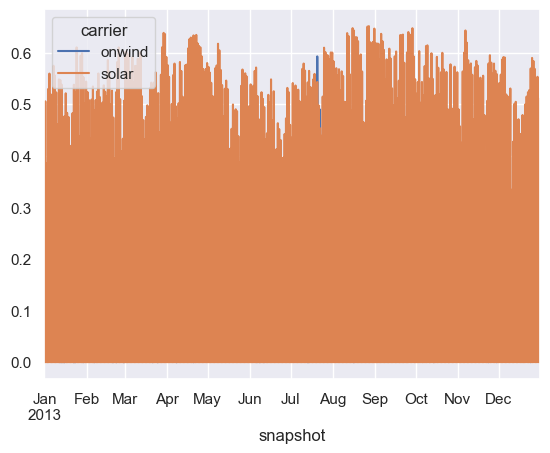

In [83]:
n.generators_t.p_max_pu.groupby(n.generators.carrier, axis=1).mean().plot()

<AxesSubplot:xlabel='snapshot'>

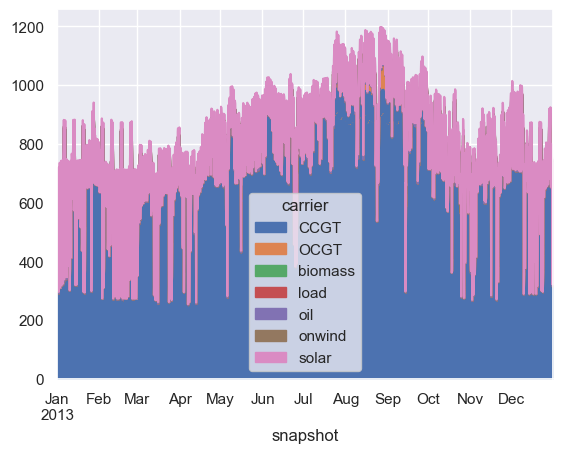

In [84]:
#excluded_carrier = 'load'
#grouped_mean = n.generators_t.p.groupby(n.generators.carrier, axis=1).mean().drop(columns=excluded_carrier)
#grouped_mean.plot(kind='line')

n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().plot(kind = "area")

<AxesSubplot:xlabel='snapshot'>

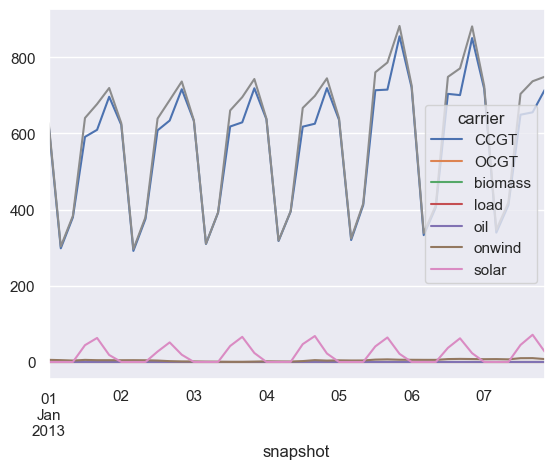

In [85]:
#n.generators_t.p.loc["2013-01-01":"2013-01-07",:].plot()
#n.generators_t.p.loc["2013-01-01":"2013-01-07",:].groupby(n.generators.carrier, axis=1).mean().plot()

n.generators_t.p.loc["2013-01-01":"2013-01-07",:].groupby(n.generators.carrier, axis=1).sum().plot(kind = "line")

n.generators_t.p.loc["2013-01-01":"2013-01-07",:].groupby(n.generators.carrier, axis=1).sum().sum(axis=1).plot(kind = "line")



In [86]:
# If 0, all renewable capacity potential is used
n.generators.p_nom_max.sum() - n.generators.p_nom_opt.sum()

inf

In [87]:
n.loads_t.p.sum().sum()

2834522.6406109324

In [88]:
n.generators_t.p.sum().sum()

1756626.111516766

In [89]:
#### pq la multiplicacion?

n.generators.iloc[:, :].groupby(["bus", "carrier"]).p_nom.sum()

bus   carrier
BO 0  OCGT       4.925000e+01
      biomass    4.940000e+00
      load       1.000000e+09
      oil        1.174000e+01
      onwind     5.631965e+00
      solar      3.009676e+01
BO 1  CCGT       7.807500e+02
      OCGT       8.747000e+02
      biomass    7.229000e+01
      load       1.000000e+09
      onwind     1.149717e+01
      solar      1.169260e+01
BO 2  CCGT       2.483000e+02
      OCGT       1.659700e+02
      load       1.000000e+09
      onwind     5.719284e+00
      solar      4.021762e+01
BO 3  OCGT       1.499100e+02
      load       1.000000e+09
      onwind     2.381991e+00
      solar      3.671401e+01
Name: p_nom, dtype: float64

### Lines

In [90]:
n.lines

,bus0,bus1,length,type,s_max_pu,s_nom,capital_cost,num_parallel,s_nom_extendable,s_nom_min,x,r,b,build_year,carrier,x_pu_eff,r_pu_eff,s_nom_opt,v_nom,g,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,BO 0,BO 3,312.606737,Al/St 240/40 4-bundle 380.0,0.7,983.112038,11910.725884,0.578947,True,569.170127,132.829444,16.198713,0.000785,0,AC,0.002744,0.000335,569.170129,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,BO 1,BO 3,391.342503,Al/St 240/40 4-bundle 380.0,0.7,983.112038,14912.981097,0.578947,True,569.170127,166.284987,20.278657,0.000982,0,AC,0.003436,0.000419,569.170128,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,BO 2,BO 3,343.809330,Al/St 240/40 4-bundle 380.0,0.7,1966.224077,13100.470521,1.157895,True,1138.340255,73.043855,8.907787,0.001726,0,AC,0.001509,0.000184,1138.340259,220.0,0.0,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [91]:
print(type(n.lines_t))
print(n.lines_t)

<class 'pypsa.descriptors.Dict'>
{'s_max_pu': Empty DataFrame
Columns: []
Index: [2013-01-01 00:00:00, 2013-01-01 04:00:00, 2013-01-01 08:00:00, 2013-01-01 12:00:00, 2013-01-01 16:00:00, 2013-01-01 20:00:00, 2013-01-02 00:00:00, 2013-01-02 04:00:00, 2013-01-02 08:00:00, 2013-01-02 12:00:00, 2013-01-02 16:00:00, 2013-01-02 20:00:00, 2013-01-03 00:00:00, 2013-01-03 04:00:00, 2013-01-03 08:00:00, 2013-01-03 12:00:00, 2013-01-03 16:00:00, 2013-01-03 20:00:00, 2013-01-04 00:00:00, 2013-01-04 04:00:00, 2013-01-04 08:00:00, 2013-01-04 12:00:00, 2013-01-04 16:00:00, 2013-01-04 20:00:00, 2013-01-05 00:00:00, 2013-01-05 04:00:00, 2013-01-05 08:00:00, 2013-01-05 12:00:00, 2013-01-05 16:00:00, 2013-01-05 20:00:00, 2013-01-06 00:00:00, 2013-01-06 04:00:00, 2013-01-06 08:00:00, 2013-01-06 12:00:00, 2013-01-06 16:00:00, 2013-01-06 20:00:00, 2013-01-07 00:00:00, 2013-01-07 04:00:00, 2013-01-07 08:00:00, 2013-01-07 12:00:00, 2013-01-07 16:00:00, 2013-01-07 20:00:00, 2013-01-08 00:00:00, 2013-01-08 04:0

In [92]:
n.lines_t.p0.max()
n.lines_t.p0.min()

Line
1   -298.836131
2     30.635106
3   -258.324147
dtype: float64

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:xlabel='snapshot'>

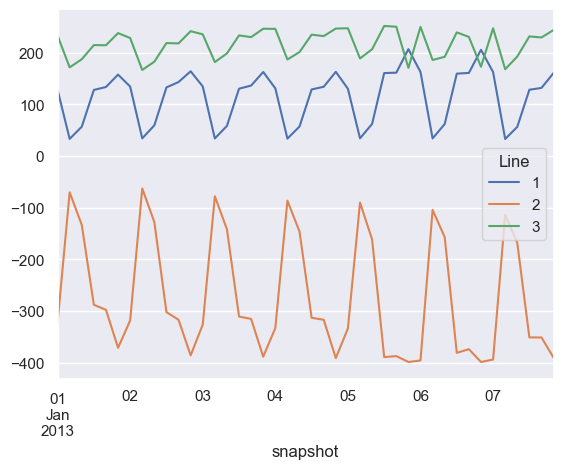

In [93]:
print(type(n.lines_t.p0) and type(n.lines_t.p1))

n.lines_t.p1.loc["2013-01-01":"2013-01-07",:].plot(kind = "line")

### Demand

In [94]:
print(type(n.generators.iloc[:, :].groupby(["bus"]).p_nom_opt.sum()))

print(n.generators.iloc[:, :].groupby(["bus"]).p_nom_opt.sum())

<class 'pandas.core.series.Series'>
bus
BO 0    1.000000e+09
BO 1    1.000002e+09
BO 2    1.000000e+09
BO 3    1.000000e+09
Name: p_nom_opt, dtype: float64


<AxesSubplot:xlabel='snapshot'>

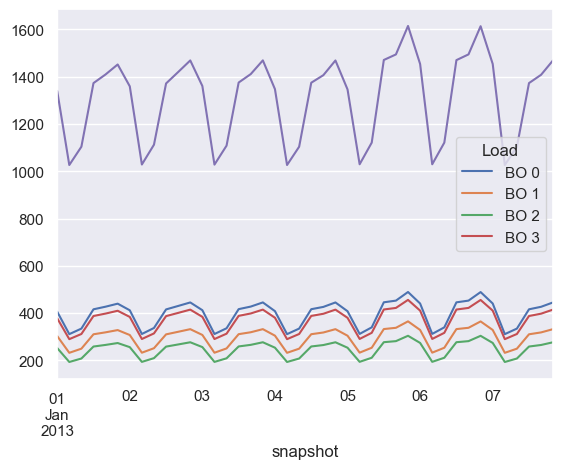

In [95]:
#n.loads_t.p_set.loc["2013-01-01":"2013-12-30","BO0 0"].plot()

n.loads_t.p_set.loc["2013-01-01":"2013-01-07",:].plot()

n.loads_t.p_set.loc["2013-01-01":"2013-01-07",:].sum(axis=1).plot()


Load
BO 0    859099.596218
BO 1    640972.748222
BO 2    533969.211578
BO 3    800481.084593
dtype: float64
2834522.6406109324


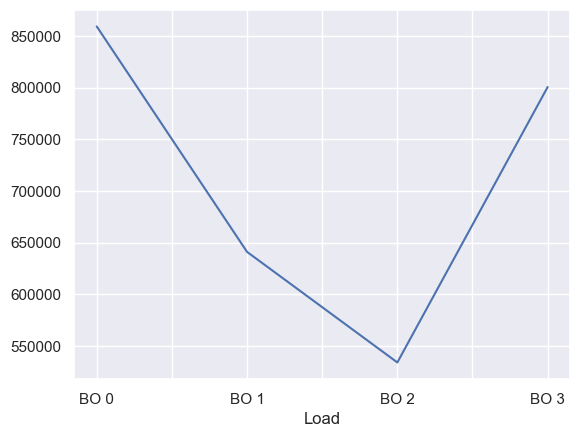

In [96]:
print(n.loads_t.p_set.sum())

n.loads_t.p_set.sum().plot()

print(n.loads_t.p_set.sum().sum())

In [97]:
a = n.loads_t.p_set.sum().rename("load").rename_axis("bus")
a.rename("load", inplace=True)
a.rename_axis("bus", inplace=True)
a

bus
BO 0    859099.596218
BO 1    640972.748222
BO 2    533969.211578
BO 3    800481.084593
Name: load, dtype: float64

In [98]:
n.generators.iloc[:, :].groupby(["bus"]).p_nom_opt.sum()

###### potencia maxima?
#n.generators.iloc[:, :].groupby(["bus"]).p_max_pu.sum()

bus
BO 0    1.000000e+09
BO 1    1.000002e+09
BO 2    1.000000e+09
BO 3    1.000000e+09
Name: p_nom_opt, dtype: float64

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


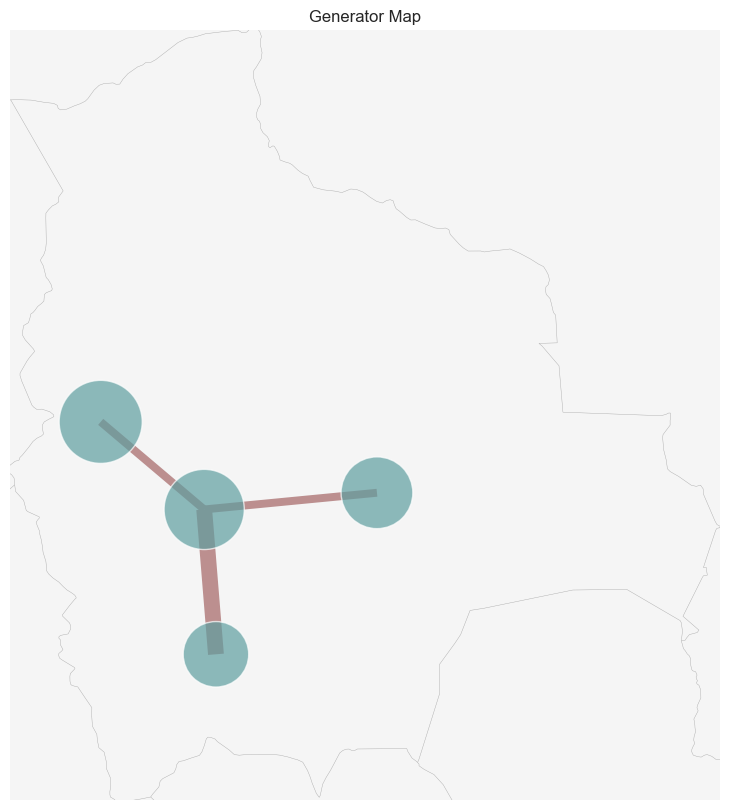

In [99]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={
        "projection": ccrs.PlateCarree()
    },  # PlateCarree(default), Mercator, Orthographic
)

# loading = (n3.lines_t.p0.abs().mean().sort_index() / (n3.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

n.plot(
    margin=0.1,
    ax=ax,
    geomap=True,  #'10m' leads to a beautiful high resolution map
    projection=None,
    bus_colors="cadetblue",
    bus_alpha=0.7,
    bus_sizes=normalize_node_size(
        n.loads_t.p_set.sum().rename("load").rename_axis("bus")
    )*0.5,  # n.loads_t.p_set.sum().rename("load").rename_axis("bus")*.0000003,
    bus_cmap=None,
    line_colors="rosybrown",
    link_colors="darkseagreen",  # loading
    transformer_colors="orange",
    line_widths=n.lines.s_nom_opt / 1e2,
    link_widths=1.5,
    transformer_widths=1.5,
    line_cmap=None,
    link_cmap=None,  # plt.cm.virdis (colordmap for line loading)
    transformer_cmap=None,
    flow=None,
    branch_components=None,
    layouter=None,
    title="Generator Map",
    boundaries=None,
    geometry=False,
    jitter=None,
    color_geomap=True,
)  # None or True

ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


In [101]:
# backup
gen_serie = n.generators.iloc[:, :].groupby(["bus", "carrier"]).p_nom_opt.sum()
load_serie = n.loads_t.p_set.sum().rename("load").rename_axis("bus")

load_serie = pd.Series(
    load_serie.values,
    index=pd.MultiIndex.from_tuples([(id, "AC load") for id in load_serie.index]),
)

tot_serie = pd.concat([gen_serie, load_serie])  # .groupby(['bus', 'carrier']).sum()

pd.concat([gen_serie, load_serie])

bus   carrier
BO 0  OCGT       4.925000e+01
      biomass    4.940000e+00
      load       1.000000e+09
      oil        1.174000e+01
      onwind     5.631965e+00
      solar      3.009677e+01
BO 1  CCGT       7.807500e+02
      OCGT       8.747000e+02
      biomass    7.229000e+01
      load       1.000000e+09
      onwind     1.149717e+01
      solar      1.169260e+01
BO 2  CCGT       2.483000e+02
      OCGT       1.659700e+02
      load       1.000000e+09
      onwind     5.719284e+00
      solar      4.021762e+01
BO 3  OCGT       1.499100e+02
      load       1.000000e+09
      onwind     2.381992e+00
      solar      3.671401e+01
BO 0  AC load    8.590996e+05
BO 1  AC load    6.409727e+05
BO 2  AC load    5.339692e+05
BO 3  AC load    8.004811e+05
dtype: float64

### Plot of Average Marginal Price

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


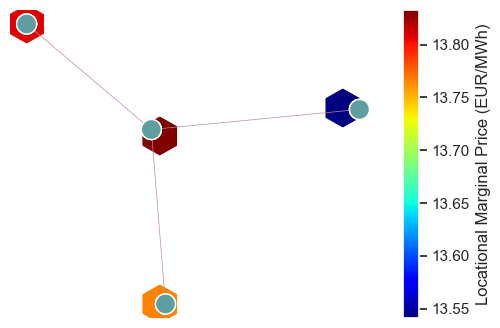

In [102]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

n = n_solve

now = n.snapshots[1800]  ##one specific time

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(7, 4)

n.plot(ax=ax, line_widths=pd.Series(0.5, n.lines.index))
plt.hexbin(
    n.buses.x,
    n.buses.y,
    gridsize=10,
    # C=n.buses_t.marginal_price.loc[now], #at one time (previous set up by scigrid)
    C=n.buses_t.marginal_price.sum()
    / len(n.snapshots[:]),  # Marginal price averaged over the whole year (My version)
    # - shows in which regions electricity will be cheap and where el. intensive companies should be placed.
    cmap=plt.cm.jet,
)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label("Locational Marginal Price (EUR/MWh)")

### Storage

<AxesSubplot:xlabel='snapshot'>

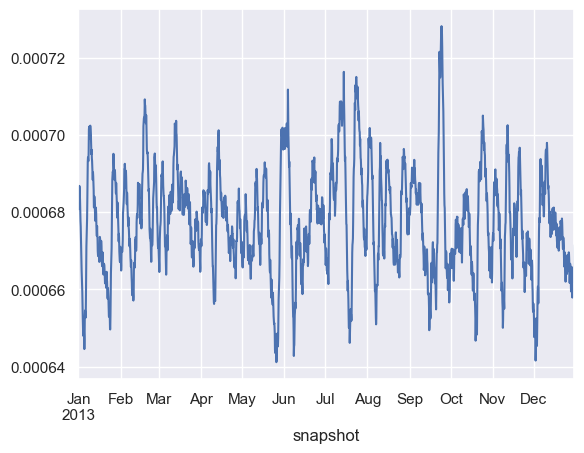

In [103]:
n.stores_t.e.loc["2013-01-01":"2013-12-30"].sum(axis=1).plot()

In [104]:
n.links.iloc[:].groupby(["carrier"]).p_nom_opt.sum()

carrier
H2 electrolysis       0.000022
H2 fuel cell          0.000030
battery charger       0.000049
battery discharger    0.000054
Name: p_nom_opt, dtype: float64

In [105]:
n.stores_t.e.sum()

Store
BO 0 H2         0.353263
BO 1 H2         0.353651
BO 2 H2         0.353374
BO 3 H2         0.353352
BO 0 battery    0.017626
BO 1 battery    0.017596
BO 2 battery    0.017631
BO 3 battery    0.017625
dtype: float64

### Storage_units (hydro reservoir)

In [106]:
n.storage_units

,p_min_pu,p_nom,max_hours,efficiency_dispatch,efficiency_store,bus,cyclic_state_of_charge,capital_cost,carrier,marginal_cost,build_year,p_nom_opt,control,type,p_nom_extendable,p_nom_min,p_nom_max,p_max_pu,p_set,q_set,sign,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BO 0 hydro,0.0,277.23,6.0,0.9,0.0,BO 0,True,160627.143522,hydro,0.010784,0,277.23,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0
BO 2 hydro,0.0,26.50,6.0,0.9,0.0,BO 2,True,160627.143522,hydro,0.010233,0,26.50,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0
BO 3 hydro,0.0,428.47,6.0,0.9,0.0,BO 3,True,160627.143522,hydro,0.010026,0,428.47,PQ,,False,0.0,inf,1.0,0.0,0.0,1.0,inf,0.0,False,NaN,True,0.0,0.0


<AxesSubplot:xlabel='snapshot'>

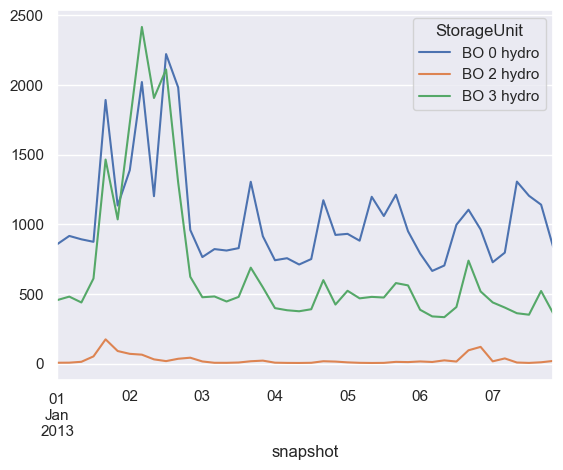

In [107]:

n.storage_units_t.inflow.loc["2013-01-01":"2013-01-07"].plot()

In [108]:
n.storage_units_t.p.loc["2013-01-01":"2013-01-01"].sum(axis=0)

StorageUnit
BO 0 hydro    1663.379994
BO 2 hydro     139.064803
BO 3 hydro    2549.868274
dtype: float64

<AxesSubplot:xlabel='snapshot'>

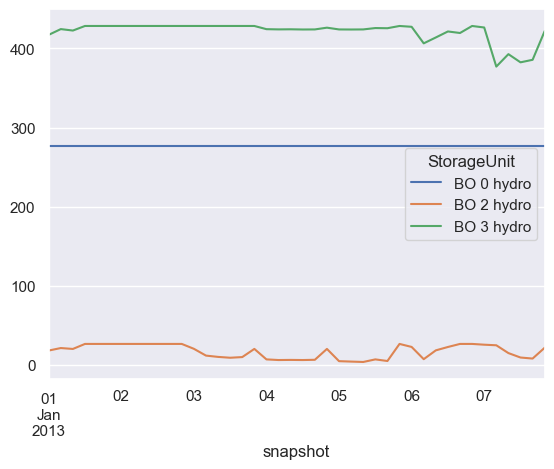

In [109]:
n.storage_units_t.p.loc["2013-01-01":"2013-01-07"].plot()

In [110]:
hydro_serie = n.storage_units.iloc[:, :].groupby(["bus", "carrier"]).p_nom_opt.sum()
hydro_serie

bus   carrier
BO 0  hydro      277.23
BO 2  hydro       26.50
BO 3  hydro      428.47
Name: p_nom_opt, dtype: float64

In [111]:
n.storage_units_t.p.sum().sum()

1077896.7405680832

# Plot Load + Generators + Storage_Units

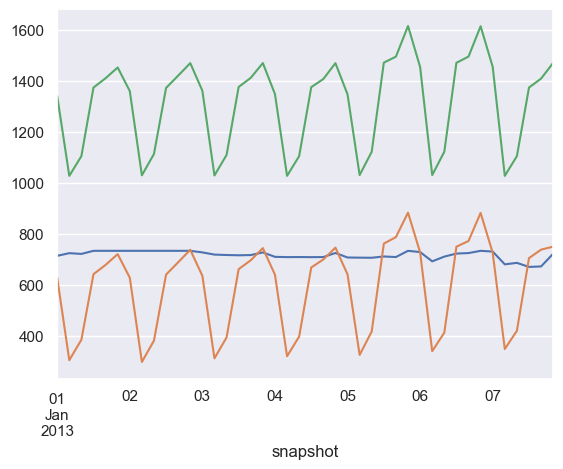

In [112]:
n.storage_units_t.p.loc["2013-01-01":"2013-01-07"].sum(axis=1).plot()

n.generators_t.p.loc["2013-01-01":"2013-01-07"].sum(axis=1).plot()

n.loads_t.p_set.loc["2013-01-01":"2013-01-07",:].sum(axis=1).plot()

Gen_SU = n.storage_units_t.p.loc["2013-01-01":"2013-01-07"].sum(axis=1) + n.generators_t.p.loc["2013-01-01":"2013-01-07"].sum(axis=1)


In [113]:
n.statistics()

Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Biomass                1.677851e-07         2.147113e+07   
            Combined-Cycle Gas     7.416952e-01         8.692295e+07   
            Oil                    9.107864e-09         4.488738e+05   
            Onshore Wind           1.115400e-01         2.757572e+06   
            Open-Cycle Gas         1.152179e-02         5.856283e+07   
            Solar                  1.833843e-01         6.037670e+06   
            load                   2.143848e-14         0.000000e+00   
Line        AC                     2.761032e-01         3.018005e+07   
Link        H2 electrolysis        5.207829e-01         1.088856e+00   
            H2 fuel cell           3.101912e-01         7.330656e-01   
            battery charger        5.022332e-01         1.881478e+00   
            battery discharger     4.068093e-01         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam        6.722074e-01         1.176112e+08   
Store       Battery Storage        5.019842e-01         1.017907e+00   
            Hydrogen Storage       5.005866e-01         1.026793e+00   

                                Curtailment  Installed Capacity  \
            carrier                                               
Generator   Biomass                0.000000        7.723000e+01   
            Combined-Cycle Gas     0.000000        1.029050e+03   
            Oil                    0.000000        1.174000e+01   
            Onshore Wind           0.000006        2.523041e+01   
            Open-Cycle Gas         0.000000        1.239830e+03   
            Solar                  0.000010        1.187210e+02   
            load                   0.000000        4.000000e+09   
Line        AC                          NaN        3.932448e+03   
Link        H2 electrolysis             NaN        0.000000e+00   
            H2 fuel cell                NaN        0.000000e+00   
            battery charger             NaN        0.000000e+00   
            battery discharger          NaN        0.000000e+00   
Load        -                           NaN                 NaN   
StorageUnit Reservoir & Dam        0.000000        7.322000e+02   
Store       Battery Storage             NaN        0.000000e+00   
            Hydrogen Storage            NaN        0.000000e+00   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Biomass                        1.939496e-04      7.723000e+01   
            Combined-Cycle Gas             9.837795e+03      1.029050e+03   
            Oil                            1.392569e-05      1.174000e+01   
            Onshore Wind                   7.052699e-02      2.523041e+01   
            Open-Cycle Gas                 2.056175e+02      1.239830e+03   
            Solar                          4.238225e-01      1.187210e+02   
            load                           8.661113e-05      4.000000e+09   
Line        AC                                      NaN      2.276681e+03   
Link        H2 electrolysis                0.000000e+00      2.231518e-05   
            H2 fuel cell                   0.000000e+00      2.997226e-05   
            battery charger                0.000000e+00      4.885976e-05   
            battery discharger             0.000000e+00      5.428862e-05   
Load        -                                       NaN               NaN   
StorageUnit Reservoir & Dam                5.134091e+00      7.322000e+02   
Store       Battery Storage               -3.541013e-28      6.410847e-05   
            Hydrogen Storage               8.687285e-27      1.289482e-03   

                                     Revenue        Supply    Withdrawal  
            carrier                                               